In [1]:
# Module Importations
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

# Module Versioning
print('Numpy Version =', np.__version__)
print('Pandas Version =', pd.__version__)
print('Seaborn Version =', sns.__version__)

Numpy Version = 1.19.4
Pandas Version = 1.1.4
Seaborn Version = 0.10.0


In [2]:
# Custom Modules
from Source.Data import ntfp_dataset_import as data_load
from Source.Features import ntfp_dataset_preprocessing as preprocessing
from Source.Visualisation import figs_helper

In [3]:
# Constants
SAVE_FIGS = False

In [4]:
# Load Dataset
raw_data_df = data_load.import_dataset()

Loading First Dataset ...
Loading Complete.


In [5]:
# Peek at dataset
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 1 to 100
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cycles  20631 non-null  int64  
 1   Set-1   20631 non-null  float64
 2   Set-2   20631 non-null  float64
 3   Set-3   20631 non-null  float64
 4   Sn_01   20631 non-null  float64
 5   Sn_02   20631 non-null  float64
 6   Sn_03   20631 non-null  float64
 7   Sn_04   20631 non-null  float64
 8   Sn_05   20631 non-null  float64
 9   Sn_06   20631 non-null  float64
 10  Sn_07   20631 non-null  float64
 11  Sn_08   20631 non-null  float64
 12  Sn_09   20631 non-null  float64
 13  Sn_10   20631 non-null  float64
 14  Sn_11   20631 non-null  float64
 15  Sn_12   20631 non-null  float64
 16  Sn_13   20631 non-null  float64
 17  Sn_14   20631 non-null  float64
 18  Sn_15   20631 non-null  float64
 19  Sn_16   20631 non-null  float64
 20  Sn_17   20631 non-null  int64  
 21  Sn_18   20631 non-null  int64  
 22  

In [6]:
raw_data_df.head(5)

Cycles   Set-1   Set-2  Set-3   Sn_01   Sn_02    Sn_03    Sn_04  \
Engine                                                                    
1            1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1            2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
1            3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
1            4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
1            5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   

        Sn_05  Sn_06  ...   Sn_12    Sn_13    Sn_14   Sn_15  Sn_16  Sn_17  \
Engine                ...                                                   
1       14.62  21.61  ...  521.66  2388.02  8138.62  8.4195   0.03    392   
1       14.62  21.61  ...  522.28  2388.07  8131.49  8.4318   0.03    392   
1       14.62  21.61  ...  522.42  2388.03  8133.23  8.4178   0.03    390   
1       14.62  21.61  ...  522.86  2388.08  8133.83  8.3682   0.03    392   
1       14.62  21.61  ...  522.19  2388.04  8133.80  8.4294   0.03    393   

        Sn_18  Sn_19  Sn_20    Sn_21  
Engine                                
1        2388  100.0  39.06  23.4190  
1        2388  100.0  39.00  23.4236  
1        2388  100.0  38.95  23.3442  
1        2388  100.0  38.88  23.3739  
1        2388  100.0  38.90  23.4044  

[5 rows x 25 columns]

In [7]:
raw_data_df.describe().T

count         mean           std        min        25%        50%  \
Cycles  20631.0   108.807862  6.888099e+01     1.0000    52.0000   104.0000   
Set-1   20631.0    -0.000009  2.187313e-03    -0.0087    -0.0015     0.0000   
Set-2   20631.0     0.000002  2.930621e-04    -0.0006    -0.0002     0.0000   
Set-3   20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
Sn_01   20631.0   518.670000  0.000000e+00   518.6700   518.6700   518.6700   
Sn_02   20631.0   642.680934  5.000533e-01   641.2100   642.3250   642.6400   
Sn_03   20631.0  1590.523119  6.131150e+00  1571.0400  1586.2600  1590.1000   
Sn_04   20631.0  1408.933782  9.000605e+00  1382.2500  1402.3600  1408.0400   
Sn_05   20631.0    14.620000  1.776400e-15    14.6200    14.6200    14.6200   
Sn_06   20631.0    21.609803  1.388985e-03    21.6000    21.6100    21.6100   
Sn_07   20631.0   553.367711  8.850923e-01   549.8500   552.8100   553.4400   
Sn_08   20631.0  2388.096652  7.098548e-02  2387.9000  2388.0500  2388.0900   
Sn_09   20631.0  9065.242941  2.208288e+01  9021.7300  9053.1000  9060.6600   
Sn_10   20631.0     1.300000  0.000000e+00     1.3000     1.3000     1.3000   
Sn_11   20631.0    47.541168  2.670874e-01    46.8500    47.3500    47.5100   
Sn_12   20631.0   521.413470  7.375534e-01   518.6900   520.9600   521.4800   
Sn_13   20631.0  2388.096152  7.191892e-02  2387.8800  2388.0400  2388.0900   
Sn_14   20631.0  8143.752722  1.907618e+01  8099.9400  8133.2450  8140.5400   
Sn_15   20631.0     8.442146  3.750504e-02     8.3249     8.4149     8.4389   
Sn_16   20631.0     0.030000  1.387812e-17     0.0300     0.0300     0.0300   
Sn_17   20631.0   393.210654  1.548763e+00   388.0000   392.0000   393.0000   
Sn_18   20631.0  2388.000000  0.000000e+00  2388.0000  2388.0000  2388.0000   
Sn_19   20631.0   100.000000  0.000000e+00   100.0000   100.0000   100.0000   
Sn_20   20631.0    38.816271  1.807464e-01    38.1400    38.7000    38.8300   
Sn_21   20631.0    23.289705  1.082509e-01    22.8942    23.2218    23.2979   

              75%        max  
Cycles   156.0000   362.0000  
Set-1      0.0015     0.0087  
Set-2      0.0003     0.0006  
Set-3    100.0000   100.0000  
Sn_01    518.6700   518.6700  
Sn_02    643.0000   644.5300  
Sn_03   1594.3800  1616.9100  
Sn_04   1414.5550  1441.4900  
Sn_05     14.6200    14.6200  
Sn_06     21.6100    21.6100  
Sn_07    554.0100   556.0600  
Sn_08   2388.1400  2388.5600  
Sn_09   9069.4200  9244.5900  
Sn_10      1.3000     1.3000  
Sn_11     47.7000    48.5300  
Sn_12    521.9500   523.3800  
Sn_13   2388.1400  2388.5600  
Sn_14   8148.3100  8293.7200  
Sn_15      8.4656     8.5848  
Sn_16      0.0300     0.0300  
Sn_17    394.0000   400.0000  
Sn_18   2388.0000  2388.0000  
Sn_19    100.0000   100.0000  
Sn_20     38.9500    39.4300  
Sn_21     23.3668    23.6184

In [8]:
# Correlate Dataset Entries

# Remove the time column from the dataframe.
corr_df = raw_data_df.drop('Cycles', axis = 1)

# Create correlation.
sensor_corr = corr_df.corr()
print(sensor_corr)

              Set-1         Set-2  Set-3         Sn_01         Sn_02  \
Set-1  1.000000e+00  1.166044e-02    NaN -1.669929e-16  9.029868e-03   
Set-2  1.166044e-02  1.000000e+00    NaN -6.876180e-16  7.266242e-03   
Set-3           NaN           NaN    NaN           NaN           NaN   
Sn_01 -1.669929e-16 -6.876180e-16    NaN  1.000000e+00  8.476569e-12   
Sn_02  9.029868e-03  7.266242e-03    NaN  8.476569e-12  1.000000e+00   
Sn_03 -5.651101e-03  9.067833e-03    NaN -1.011335e-12  6.026096e-01   
Sn_04  9.543965e-03  1.467284e-02    NaN  5.450136e-14  7.149492e-01   
Sn_05 -3.491551e-18  1.623640e-16    NaN  1.000000e+00  8.475709e-12   
Sn_06 -1.340410e-03  1.435458e-02    NaN  6.935511e-09  1.322425e-01   
Sn_07 -9.437328e-03 -1.667790e-02    NaN  1.765402e-12 -7.021365e-01   
Sn_08 -4.266868e-04  1.328473e-02    NaN -1.911824e-10  6.623250e-01   
Sn_09 -4.278809e-03 -5.424966e-03    NaN  1.244204e-13  2.737642e-01   
Sn_10 -1.225395e-16  7.690888e-16    NaN  1.000000e+00  8.475712

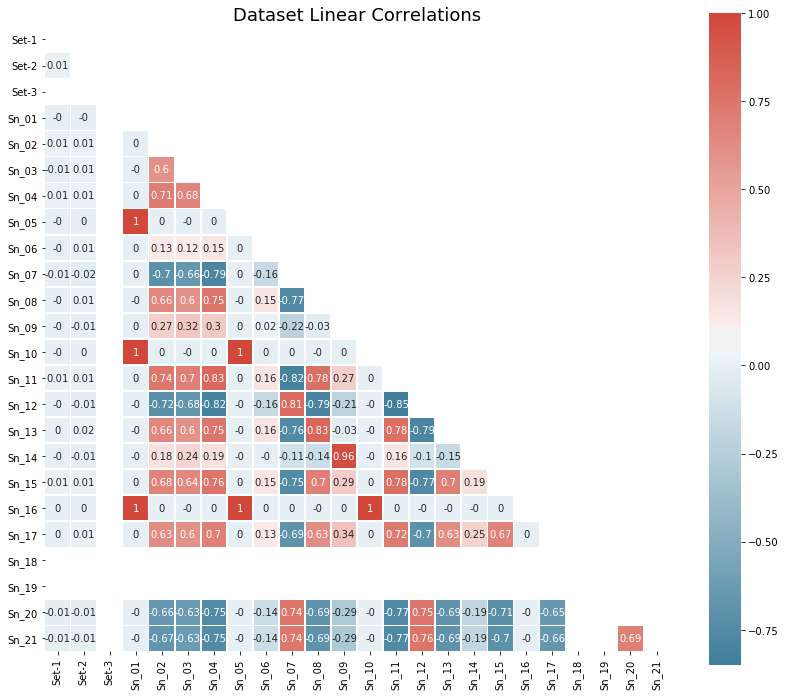

In [9]:
# Visualise Dataset Correlations

plt.figure(figsize = (14, 12))

# Round correlation to set number of decimal places
sensor_corr_round = sensor_corr.round(2)

# Create symmetry mask
mask = np.zeros_like(sensor_corr_round)
mask[np.triu_indices_from(sensor_corr_round)] = True

# Create diverging colour map
cmap = sns.diverging_palette(230, 15, n = 10, as_cmap = True)

# Create heatmap figure
corr_fig = sns.heatmap(sensor_corr_round, mask = mask, cmap = cmap, square = True, annot = True, linewidths = 0.5)

plt.title('Dataset Linear Correlations', fontsize = figs_helper.TITLE_FONTSIZE)

# Save the plot
if SAVE_FIGS == True:
    name = 'Dataset_Linear_Correlations'
    save_string = figs_helper.generate_fig_save_string(name)
    plt.savefig(save_string, format = figs_helper.SAVE_FORMAT, dpi = figs_helper.SAVE_DPI)
    print("Figure Saved ...")
    print(save_string)

plt.show()

In [10]:
# Reduce highly-correlated sensors
correlation_threshold = 0.99
    
correlated_data = preprocessing.find_correlated_data(raw_data_df, correlation_threshold)
    
columns_to_be_removed = preprocessing.list_correlated_data(correlated_data)
    
processed_df = preprocessing.dataset_remove_columns(raw_data_df, columns_to_be_removed)

print(processed_df.info)

('Sn_01', 'Sn_05', 1.0)
('Sn_01', 'Sn_10', 1.0)
('Sn_01', 'Sn_16', 1.0)
('Sn_05', 'Sn_10', 1.0)
('Sn_05', 'Sn_16', 1.0)
('Sn_10', 'Sn_16', 1.0)
<bound method DataFrame.info of         Cycles   Set-1   Set-2  Set-3   Sn_01   Sn_02    Sn_03    Sn_04  \
Engine                                                                    
1            1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1            2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
1            3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
1            4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
1            5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
...        ...     ...     ...    ...     ...     ...      ...      ...   
100        196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
100        197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
100        198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   

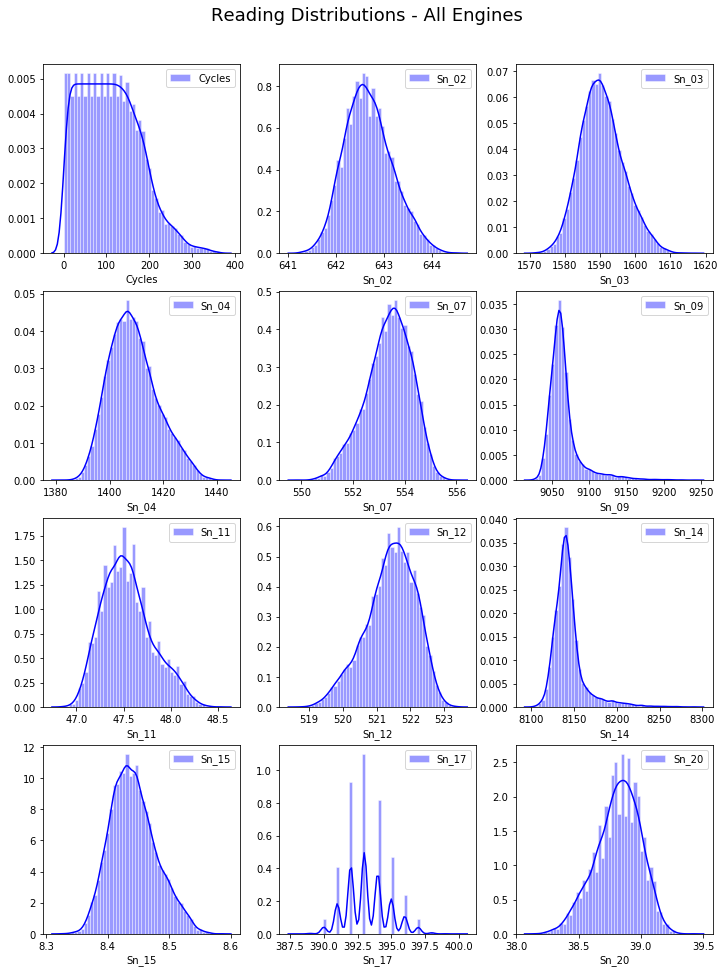

In [38]:
# Visualise Sensor Data Distribution
plotted_dataset_df = processed_df.copy()

# Determine number of individual subplots to create
columns = plotted_dataset_df.columns
figs_per_row = 3
n_columns = len(columns)
n_rows = (int(n_columns / figs_per_row))

# Create subplots
fig, axes = plt.subplots(n_rows, figs_per_row, figsize = (12, 16))
axes = axes.flatten()

# Label Title, Axes
fig.suptitle('Reading Distributions - All Engines', fontsize = figs_helper.TITLE_FONTSIZE, y = 0.93)

# Add a subplot for each sensor distribution
for column, ax in zip(columns, axes):
        
    ax = sns.distplot(plotted_dataset_df[column], ax = ax, label = column, color = "blue", hist_kws = {'edgecolor':'white'})
    ax.legend(loc = 1)

# Save plot.
if SAVE_FIGS == True:
    name = 'Reading_Distribution_All_Engines'
    save_string = figs_helper.generate_fig_save_string(name)
    plt.savefig(save_string, format = figs_helper.SAVE_FORMAT, dpi = figs_helper.SAVE_DPI)
    print("Figure Saved ...")
    print(save_string)

plt.show()

In [12]:
# Remove Time-Independent Columns
std_threshold = 0.0001

# Identify time-independent columns
time_independent_columns = preprocessing.find_time_independent_columns(processed_df, std_threshold)

print("Columns to be removed:", time_independent_columns)

# Remove columns
processed_df = preprocessing.dataset_remove_columns(processed_df, time_independent_columns)

print(processed_df.info())

Columns to be removed: ['Set-3', 'Sn_01', 'Sn_06', 'Sn_08', 'Sn_13', 'Sn_18', 'Sn_19']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 1 to 100
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cycles  20631 non-null  int64  
 1   Set-1   20631 non-null  float64
 2   Set-2   20631 non-null  float64
 3   Sn_02   20631 non-null  float64
 4   Sn_03   20631 non-null  float64
 5   Sn_04   20631 non-null  float64
 6   Sn_07   20631 non-null  float64
 7   Sn_09   20631 non-null  float64
 8   Sn_11   20631 non-null  float64
 9   Sn_12   20631 non-null  float64
 10  Sn_14   20631 non-null  float64
 11  Sn_15   20631 non-null  float64
 12  Sn_17   20631 non-null  int64  
 13  Sn_20   20631 non-null  float64
 14  Sn_21   20631 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 2.5 MB
None


In [13]:
# Calculate Remaining Useful Life (RUL)
rul_df = preprocessing.add_calculated_rul(processed_df)

print(rul_df.head())

Calculating & Appending RUl for Engine 1
Calculating & Appending RUl for Engine 2
Calculating & Appending RUl for Engine 3
Calculating & Appending RUl for Engine 4
Calculating & Appending RUl for Engine 5
Calculating & Appending RUl for Engine 6
Calculating & Appending RUl for Engine 7
Calculating & Appending RUl for Engine 8
Calculating & Appending RUl for Engine 9
Calculating & Appending RUl for Engine 10
Calculating & Appending RUl for Engine 11
Calculating & Appending RUl for Engine 12
Calculating & Appending RUl for Engine 13
Calculating & Appending RUl for Engine 14
Calculating & Appending RUl for Engine 15
Calculating & Appending RUl for Engine 16
Calculating & Appending RUl for Engine 17
Calculating & Appending RUl for Engine 18
Calculating & Appending RUl for Engine 19
Calculating & Appending RUl for Engine 20
Calculating & Appending RUl for Engine 21
Calculating & Appending RUl for Engine 22
Calculating & Appending RUl for Engine 23
Calculating & Appending RUl for Engine 24
C

Plotting Engine RUL Data: Sn_02
Plotting Engine RUL Data: Sn_03
Plotting Engine RUL Data: Sn_04
Plotting Engine RUL Data: Sn_07
Plotting Engine RUL Data: Sn_09
Plotting Engine RUL Data: Sn_11
Plotting Engine RUL Data: Sn_12
Plotting Engine RUL Data: Sn_14
Plotting Engine RUL Data: Sn_15
Plotting Engine RUL Data: Sn_17
Plotting Engine RUL Data: Sn_20
Plotting Engine RUL Data: Sn_21


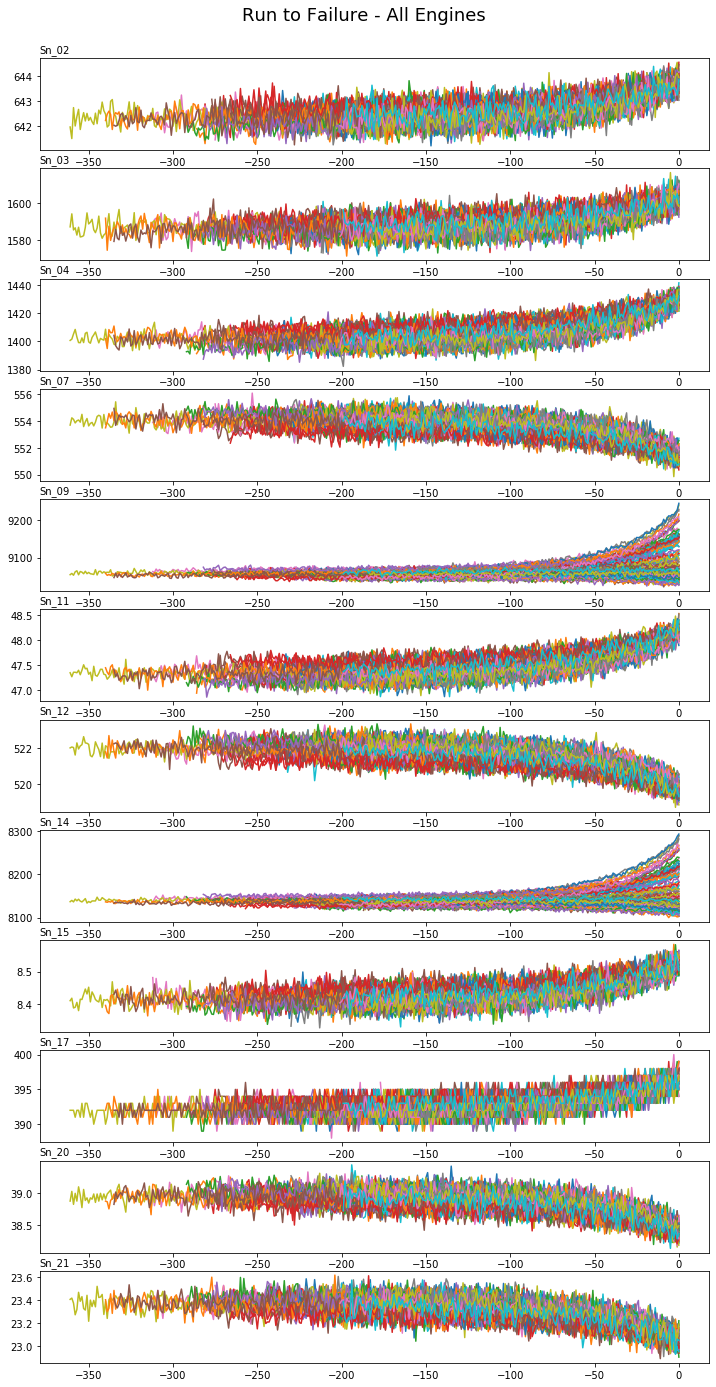

In [34]:
# Visualise RUL
plotted_dataset_df = rul_df.copy()

plotted_dataset_df.drop('Cycles', axis = 1, inplace = True)

columns = plotted_dataset_df.columns

# Define and show plot.
fig, axes = plt.subplots(len(columns) - 1, 1, figsize = (12, 24))

for column, ax in zip(columns, axes):
    print("Plotting Engine RUL Data: " + str(column))
    # Filter for the RUL data only.
    if column == 'RUL':
        continue

    fontdict = {'fontsize': 10}
    ax.set_title(column, loc = 'left', fontdict = fontdict)

    # Add data for each engine to axis.
    for engine in plotted_dataset_df.index.unique():
        rul_time = plotted_dataset_df.loc[engine, 'RUL']
        ax.plot(rul_time, plotted_dataset_df.loc[engine, column], label = column)

# Add figure title.
fig.suptitle('Run to Failure - All Engines', fontsize = figs_helper.TITLE_FONTSIZE, y = 0.91)

# Save the plot.
if SAVE_FIGS == True:
    name = 'Time_History_All_Engines'
    save_string = figs_helper.generate_fig_save_string(name)
    plt.savefig(save_string, format = figs_helper.SAVE_FORMAT, dpi = figs_helper.SAVE_DPI)
    print("Figure Saved ...")
    print(save_string)

plt.show()

In [15]:
# Remove data columns with no trend
data_columns_no_trend = [ 'Set-1', 'Set-2']

# Remove columns
rul_df = preprocessing.dataset_remove_columns(rul_df, data_columns_no_trend)

print(rul_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 1 to 100
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cycles  20631 non-null  int64  
 1   Sn_02   20631 non-null  float64
 2   Sn_03   20631 non-null  float64
 3   Sn_04   20631 non-null  float64
 4   Sn_07   20631 non-null  float64
 5   Sn_09   20631 non-null  float64
 6   Sn_11   20631 non-null  float64
 7   Sn_12   20631 non-null  float64
 8   Sn_14   20631 non-null  float64
 9   Sn_15   20631 non-null  float64
 10  Sn_17   20631 non-null  int64  
 11  Sn_20   20631 non-null  float64
 12  Sn_21   20631 non-null  float64
 13  RUL     20631 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 3.0 MB
None


In [16]:
# Save dataset
filename = 'rul_dataset'
data_load.pickle_data(rul_df, filename)

Pickling dataframe ...
Pickled dataframe to: C:/Developer/nasa-turbofan-failure-prediction/Data/Interim/rul_dataset.pkl
